# Human Knee prothesis analysis

In [1]:
#%%capture
import scipy
import matplotlib.pyplot as plt  # Plots
import numpy as np
import quaternion
%matplotlib notebook

In [2]:
from ipywidgets import interactive

Import personal functions:

In [3]:
import analysis_func as af
import fuse_tracking as ft

# Zeige den Einbau:

<img src="../imgs/einbau.png" alt="Drawing" style="width: 700px;"/>

<center>

| _p5_   |    _n_        |  _m5_ |
|----------|:-------------:|------:|
| +5° |  0° | -5° |

</center>

### Load and visualise the data

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

Reading all  mat files


100%|██████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<?, ?it/s]


Reading all  csv files


<IPython.core.display.Javascript object>


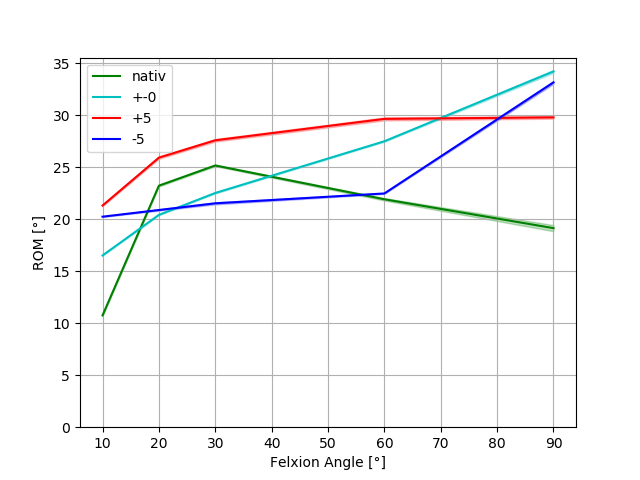

<IPython.core.display.Javascript object>


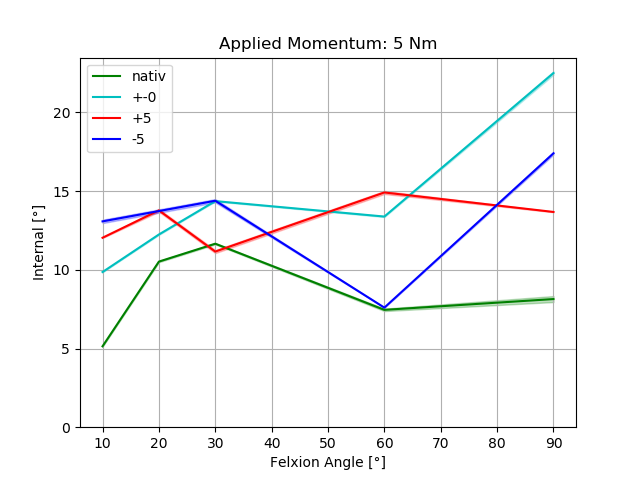

<IPython.core.display.Javascript object>


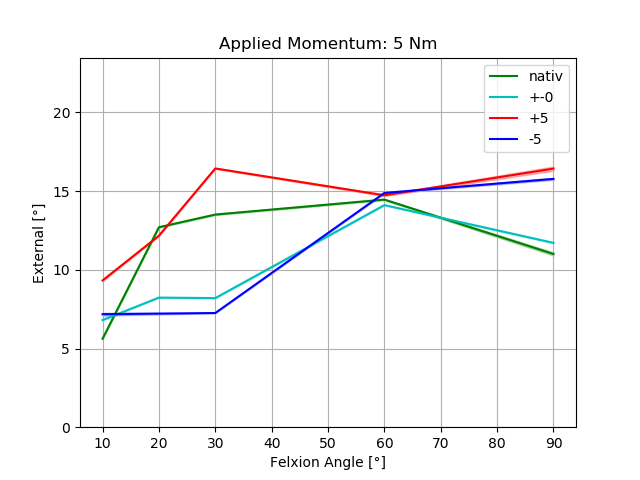

In [9]:
infos = {
	# Important Infos which data to take
	'dir': '../data/robot',  # path of important robot files
	'dir_tr': '../data/tracking',
	'extension': 'mat',  # data extension
	'extension_tr': 'csv',
	'categories': ["nativ", "+-0", "+5", "-5"],  # categories

	# Information about the preparation of the data
	'start': 100,  # Starting parameter of visualization
	'fs': 1000,  # Control Frequency in Hz
	'but_ord': 2,  # Order of Butterworth filter
	'but_freq': 0.5,  # Cutoff frequency
	'deg_arr': [10.0, 20.0, 30.0, 60.0, 90.0],  # Tested degrees

	# Information about which data to select!
	'rel_deg': [90],  # the relevant data of the degrees!
	'rel_cat': ["nativ", "+-0", "+5", "-5"],
	'rel_prog': {
		# 'Stop':0,
		# 'Flexion':19,
		# 'Pivot Shift':23,
		# 'Varus-Valgus': 24,
		'Internal-External': 25,
		# 'Lachmann':26,
		# 'Lachmann v2':27,
	},
    'q_change': np.quaternion(1, 0, 0, 0), # offset quaternion
}

#np.quaternion(1, 0, 0, 0), # offset quaternion
#np.quaternion(0.5, -0.6, -0.2, 0.5), # offset quaternion
#np.quaternion(0.6, 0.3, -0.6, 0.3), # offset quaternion

# load files
rob_data, tr_data = af.read_dir(infos)
# partition files
all_parts = af.partition_all(rob_data, infos)
# visualize files
#af.vis_partitioning(all_parts, infos)
af.rom_plots(all_parts, infos, use_all=False, std_fac=1)

In [5]:
# af.rom_plots(all_parts, infos, use_all=False)

In [6]:
import ipywidgets as widgets

In [7]:
def update(w, x, y, z):
    q = np.quaternion(w, x, y, z)
    af.show_rot(all_parts, infos, q)

In [8]:
w = widgets.FloatSlider(min=-1, max=1, value=0.5)
x = widgets.FloatSlider(min=-1, max=1, value=-0.6)
y = widgets.FloatSlider(min=-1, max=1, value=-0.2)
z = widgets.FloatSlider(min=-1, max=1, value=0.5)

#widgets.interactive(update, w=w, x=x, y=y, z=z)